In [ ]:
!pip install -q catboost

     |████████████████████████████████| 76.6 MB 50.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [247]:
series = np.array([ 45.,  46.,  53.,  51.,  56.,  45.,  79.,  63.,  54.,  54.,  54.,
        48.,  72.,  55.,  70.,  64.,  47.,  53.,  94.,  71.,  67.,  53.,
        74.,  88.,  58.,  52.,  49.,  42.,  65., 106.,  62.,  72.,  75.,
        89.,  70.,  84.,  51.,  57.,  76., 101.,  66.,  83.,  73.,  84.,
       118., 141.,  99.,  91., 104.,  97.,  97.,  74.])

In [248]:
actual = [100., 102., 103.,59.]

In [249]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)]
        _y = data[i + seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x), np.array(y)

In [250]:
seq_length = 5

x, y = sliding_windows(series, seq_length)

In [251]:
x.shape, y.shape

((47, 5), (47,))

In [252]:
model = CatBoostRegressor()

In [253]:
model.fit(x, y)

Learning rate set to 0.025256
0:	learn: 20.8103385	total: 830us	remaining: 830ms
1:	learn: 20.6762814	total: 1.2ms	remaining: 598ms
2:	learn: 20.5244650	total: 1.55ms	remaining: 517ms
3:	learn: 20.3958375	total: 1.87ms	remaining: 466ms
4:	learn: 20.2893514	total: 2.2ms	remaining: 438ms
5:	learn: 20.1854757	total: 2.52ms	remaining: 417ms
6:	learn: 20.0736859	total: 2.83ms	remaining: 402ms
7:	learn: 19.9488291	total: 3.16ms	remaining: 391ms
8:	learn: 19.8390368	total: 3.49ms	remaining: 384ms
9:	learn: 19.7465801	total: 6.06ms	remaining: 600ms
10:	learn: 19.5945960	total: 6.44ms	remaining: 579ms
11:	learn: 19.4805334	total: 7.44ms	remaining: 613ms
12:	learn: 19.3808132	total: 8.15ms	remaining: 619ms
13:	learn: 19.2725066	total: 8.5ms	remaining: 599ms
14:	learn: 19.1560628	total: 8.85ms	remaining: 581ms
15:	learn: 19.0487867	total: 10.5ms	remaining: 648ms
16:	learn: 18.9272795	total: 11.3ms	remaining: 652ms
17:	learn: 18.8243030	total: 11.9ms	remaining: 652ms
18:	learn: 18.7297084	total: 1

In [254]:
res = []
data = series.tolist()

for i in range(0, 4):
  test = np.array(data[-seq_length:])
  predict = model.predict(np.expand_dims(test, axis=0))
  res.append(predict.item())
  data.append(predict.tolist()[0])

In [255]:
res

[89.54225130253761, 89.62675964812738, 92.47217965692921, 83.60765021025918]

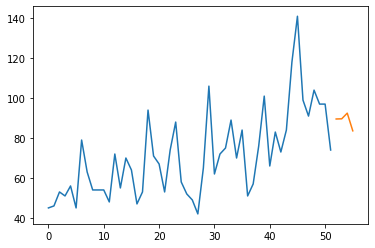

In [256]:
plt.plot(series)
plt.plot(np.arange(len(series), len(series) + 4), res)
plt.show()

In [257]:
result_df = pd.DataFrame({'Actual':actual,'Prediction':res})

In [258]:
result_df['difference'] = round(result_df['Actual'] - result_df['Prediction'], 2)
result_df['error-percentage'] = (result_df['difference'] / result_df['Actual']) * 100
result_df['error-percentage'] = result_df['error-percentage'].apply(lambda x: round(x, 2))

In [259]:
result_df

,Actual,Prediction,difference,error-percentage
0,100.0,89.542251,10.46,10.46
1,102.0,89.626760,12.37,12.13
2,103.0,92.472180,10.53,10.22
3,59.0,83.607650,-24.61,-41.71
